In [1]:
import numpy as np
import pandas as pd
from scipy.special import logit
from fairforest import d_tree
from fairforest import utils
import warnings
import matplotlib.pyplot as plt

In [2]:
warnings.simplefilter("ignore")


In [3]:
np.random.seed(0)

In [4]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


Here Z ∼ binomial(1, 0.5) is the protected attribute. Features related to the protected attribute are sampled from X ∼ N(µ, I) with µ = 1 when Z = 0 and µ = 2 when Z = 1. Other features not related to the protected attribute Z are generated with µ = 0. First 4 features are correlated with z. The first 10 features are correlated with y according to a logistic regression model y = logit(β^TX) with β ∼ N(µβ, 0.1), where µβ = 5 for the first 6 features and µβ = 0 for all others.

In [22]:
z = np.zeros(1000)
for j in range(1000):
    z[j] = np.random.binomial(1,0.5)
x_correlated = np.zeros((1000,4))
x_uncorrelated = np.zeros((1000,16))
for j in range(16):
    for i in range (1000):
        if j < 4:
            x_correlated[i][j] = np.random.normal((z[i]*2 + 10), 1, 1)
        x_uncorrelated[i][j] = np.random.normal(0,1,1)
x = np.concatenate((x_correlated,x_uncorrelated),axis=1)
x = np.concatenate((x,np.reshape(z,(1000,1))),axis=1)
b = np.zeros(21)
noise = np.random.normal(0,1,1000)
for i in range (10):
    b[i] = np.random.normal(5,0.1,1)
y = logit(NormalizeData(np.dot(x,b)) + noise.T)
for i in range (len(y)):
    if y[i] > 0:
        y[i] = int(1)
    else:
        y[i] = int(0)
column = []
for i in range(21):
    column.append(str(i+1))
dataframe = pd.DataFrame(x, columns = column)


In [23]:
model_dtree = d_tree.DecisionTree(20,0,'21',1)
model_dtree.fit(dataframe,y)



build tree for node  0
spliting
spliting done
14 -0.48628298355753774
build tree for node  1
spliting
spliting done
15 2.727706000881293
build tree for node  3
spliting
spliting done
19 1.026193998624007
build tree for node  5
spliting
spliting done
19 0.7957742535230151
build tree for node  7
spliting
spliting done
9 0.6667169329122717
build tree for node  9
spliting
spliting done
10 1.7739421109627675
build tree for node  11
spliting
spliting done
10 1.1021466604866685
build tree for node  13
spliting
spliting done
13 0.594388544400418
build tree for node  15
spliting
spliting done
17 2.005916952550997
build tree for node  17
spliting
spliting done
19 -2.283133218977109
build tree for node  19
only one class for this node
build tree for node  20
spliting
spliting done
20 1.2572946822307274
build tree for node  21
spliting
spliting done
16 -1.7003388231534555
build tree for node  23
only one class for this node
build tree for node  24
spliting
spliting done
16 0.641020457626244
build 

In [24]:
fairness_importance = model_dtree._fairness_importance()

1 0.01561942959001783
2 0.15873015873015872
3 0.12222222222222223
4 0.09895577395577397
5 0.031198686371100164
6 -0.0378787878787879
7 0.12727272727272726
8 0.07899159663865545
9 -0.014069264069264073
10 -0.3595302445302445
11 -0.21951219512195122
12 0.0
13 0.0
14 0.07105263157894737
15 0.0
16 0.046153846153846156
17 0.0
18 -0.06944444444444443
19 -0.06349206349206349
20 0.0
21 0


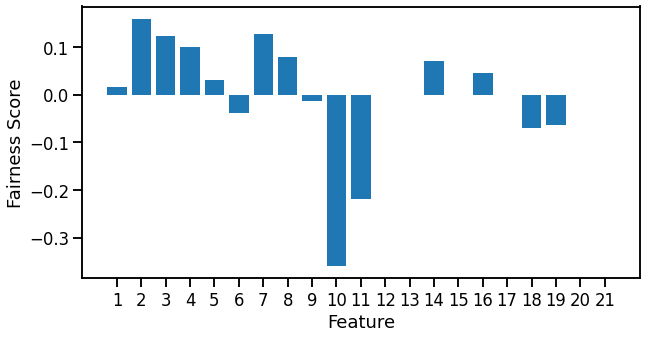

In [25]:
feature = []
score = []
for key, value in fairness_importance.items():
    print(key, value)
    feature.append(key)
    score.append((value))
utils.draw_plot(feature,score,"Results/Synthetic/eqop.pdf")



In [26]:
model_dtree_dp = d_tree.DecisionTree(20,0,'21',2)
model_dtree_dp.fit(dataframe,y)



build tree for node  0
spliting
spliting done
14 -0.48628298355753774
build tree for node  1
spliting
spliting done
15 2.727706000881293
build tree for node  3
spliting
spliting done
19 1.026193998624007
build tree for node  5
spliting
spliting done
19 0.7957742535230151
build tree for node  7
spliting
spliting done
9 0.6667169329122717
build tree for node  9
spliting
spliting done
10 1.7739421109627675
build tree for node  11
spliting
spliting done
10 1.1021466604866685
build tree for node  13
spliting
spliting done
13 0.594388544400418
build tree for node  15
spliting
spliting done
17 2.005916952550997
build tree for node  17
spliting
spliting done
19 -2.283133218977109
build tree for node  19
only one class for this node
build tree for node  20
spliting
spliting done
20 1.2572946822307274
build tree for node  21
spliting
spliting done
16 -1.7003388231534555
build tree for node  23
only one class for this node
build tree for node  24
spliting
spliting done
16 0.641020457626244
build 

In [27]:
fairness_importance_dp = model_dtree_dp._fairness_importance()

1 0.05463606492501176
2 0.08063399942054912
3 0.03650874685807248
4 0.014060730152174945
5 -0.08824841875175003
6 0.13065760832304948
7 -0.06566905482196113
8 0.006551584716514561
9 0.09270784624554147
10 -0.1595238581244938
11 -0.04018076053206942
12 0.0980352987174192
13 0.056451466659543474
14 0.20194317565864095
15 -0.1309365416097205
16 -0.028460912064102194
17 -0.009640649922612904
18 -0.006704047581253221
19 -0.0022898315096238847
20 0.040568466549553345
21 0


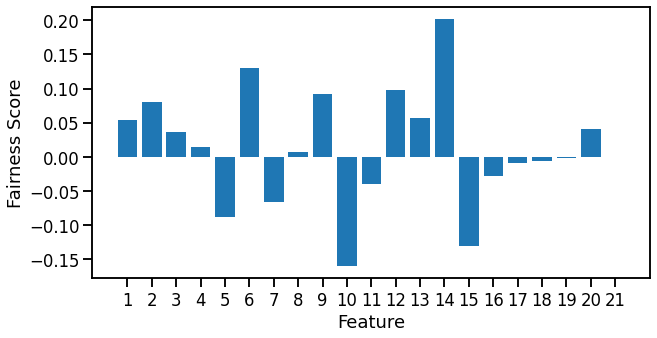

In [28]:
feature = []
score_dp = []
for key, value in fairness_importance_dp.items():
    print(key, value)
    feature.append(key)
    score_dp.append((value))
utils.draw_plot(feature,score_dp,"Results/Synthetic/DP.pdf")


In [29]:
count_z0 = count_z1 = 0
count0 = count1 = 0
z0 = z1 = 0
for i in range (1000):
    if y[i] == 0:
        count0+=1
    else:
        count1+=1
        if x[i][20] == 0:
            count_z0 += 1
        else:
            count_z1 +=1
    if x[i][20] == 0:
        z0+=1
    else:
        z1+=1
print(count0,count1, count_z0,count_z1,z0,z1)



809 191 104 87 498 502
